In [14]:
%%R
explore_onevariable <- function(df, numbers)
  {
    df <- data.frame(df,stringsAsFactors = TRUE)
    graphs <- list()
    
    if(missing(numbers)) numbers <- c(1:ncol(df))
    for (x in 1:ncol(df))
    {
      if(!is.factor(df[,x])){
        if(!x %in% numbers) next
        t1<- ggplot(data.frame(df[,x]), aes(x=df[,x])) +
          geom_bar(color ="blue",fill ="lightblue1") +
          geom_density()+labs(title =paste("Histogram of" , colnames(df)[x] )
          )+ xlab(paste("" , colnames(df)[x] )) 
        t2<- ggplot(data.frame(df[,x]), aes(x=df[,x])) +
          geom_boxplot(color ="blue",fill ="lightblue1") +
          labs(title =paste("Boxplot of" , colnames(df)[x] )
          )+ xlab(paste("" , colnames(df)[x] )) +
          scale_x_log10()
        gridExtra::grid.arrange(t1,t2,ncol = 2) 
        
      }
      
      # grid.arrange(graphs[[x]],t1,ncol =2)
      if(is.factor(df[,x]))
      {
        
        
        df_graph <- df # dataframe
        col <- colnames(df)[x]    # enter string that include name of col
        
        df_graph <- as.data.frame(table(df_graph[,col])) %>%   
          mutate(prop = Freq / sum(Freq) *100) %>%
          mutate(ypos = cumsum(prop)- 0.5*prop )
        pie1 <- ggplot(df_graph, aes(x =" ", y=df_graph[,4], fill = fct_inorder(factor(df_graph[,1])))) + 
          geom_bar(width = 1, stat = "identity") +
          theme(axis.line = element_blank(), 
                plot.title = element_text(hjust=0.5))+ 
          labs(fill="category" , title = paste("distribution of " ,colnames(df)[x]  ))+
          
          coord_polar(theta = "y" ,start = 0  ) +
          geom_text(aes(x=1.6, label=paste0(round(prop), "%")),
                    position = position_stack(vjust=0.5))+
          theme(axis.text.x=element_blank()) +
          scale_fill_discrete(name = "category   freq", labels = paste(df_graph$Var1,"  ",df_graph$Freq))
        print(pie1)     
        
      }
    } 
  }
############################  
  explore_twovariables <- function(df,target)
  {
    
    df <- data.frame(df,stringsAsFactors = TRUE)
    if(!is.integer(target)) ind <- which( colnames(df) == target)
    factorsind <- as.numeric(which(sapply(df,is.factor)))
    for (i in 1:ncol(df)) { # 
      cat("ind " , i ,"
" )
      # & is.numeric(df[,i]) 
      if( i != ind && is.vector(df[,i]) )
      {
        
        t<-  ggplot(data = df,aes(x=df[,i],y= df[,ind] 
        ) ) + 
          geom_jitter()   +
          geom_smooth(method = "lm")+
          xlab(paste("" , colnames(df)[i] ))+ylab(paste("" , colnames(df)[ind] ))
        print(t)
        
        
      } else if( i != ind && is.factor(df[,i]) )
      {
        
        t<-  ggplot(data = df,aes(x=df[,i],y= df[,ind] 
        ) ) + 
          geom_boxplot()   +
          
          xlab(paste("" , colnames(df)[i] ))+ylab(paste("" , colnames(df)[ind] ))
        print(t)
        
        
      }
      
    }
  }
######################
  explore_threevariables <- function(df,target)
  {
    
    df <- data.frame(df,stringsAsFactors = TRUE)
    if(!is.integer(target)) ind <- which( colnames(df) == target)
    factorsind <- as.numeric(which(sapply(df,is.factor)))
    for (i in 1:ncol(df)) { # 
      cat("ind " , i ,"
" )
      # & is.numeric(df[,i]) 
      if( i != ind && is.vector(df[,i]) )
      {
        for(indfactor in 1:length(factorsind))
        {
          
          t<-  ggplot(data = df,aes(x=df[,i],y= df[,ind] ,
                                    color = df[,factorsind[indfactor]] ) ) + 
            geom_jitter()   +
            geom_smooth(method = "glm")+
            guides(color=guide_legend(title=paste("",colnames(df)[factorsind[indfactor]]))) +
            xlab(paste("" , colnames(df)[i] ))+ylab(paste("" , colnames(df)[ind] ))
          print(t)
        }
        
      }
    }
  }
  
  
  explore_corralation <- function(df)
  {
    
    df <- data.frame(df,stringsAsFactors = FALSE)
    for (x in 1:ncol(df))
    {
      if(is.factor(df[,x]))
      {
        levels(df[,x]) <- c(1:nlevels(df[,x])) 
        df[,x]<-as.numeric(df[,x])
      }
    }
    corr <- round(cor(df), 1)
    cor_threshold <- 0.5
    summary(corr)
    ggcorrplot(corr, hc.order = TRUE, 
               type = "lower", 
               lab = TRUE, 
               lab_size = 3, 
               method="circle", 
               colors = c("tomato2", "white", "springgreen3"), 
               title="Correlogram of mtcars", 
               ggtheme=theme_bw)
  }    
    
    
 

In [1]:
## welcome to another course for regresion problem in this lesson we will see hwo it's beautiful to atuomatize a code and have
## powerful result in small time and save alot of time but some times in this operation you should be creative as data scientist 
## we are here in eda exploratory data abalysis and apply machine learning methods to predictive analysis 
## let's go 

In [2]:
# to go and fetch reproducable code
import repreducabile_code as rc

In [25]:

%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
#read data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)  
    

In [26]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [27]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


<AxesSubplot:>

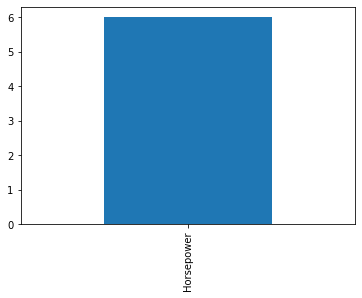

In [29]:

# missing values 
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()    
    

In [12]:
%load_ext rpy2.ipython

In [15]:
%%R -i df 
str(df)

'data.frame':	398 obs. of  8 variables:
 $ MPG         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ Cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ Horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ Weight      : num  3504 3693 3436 3433 3449 ...
 $ Acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ Model Year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ Origin      : int  1 1 1 1 1 1 1 1 1 1 ...


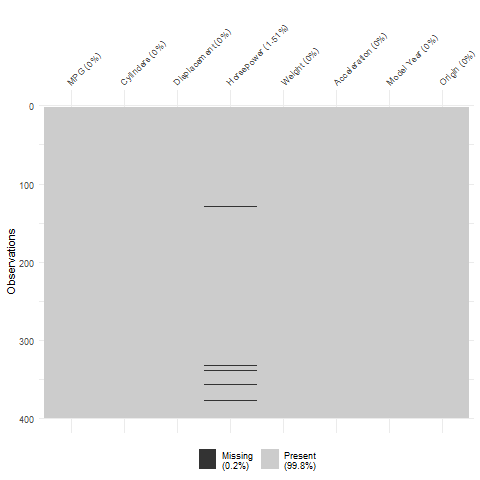

In [16]:
%%R -i df
visdat::vis_miss(df)

In [34]:
## handling with missing data
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())

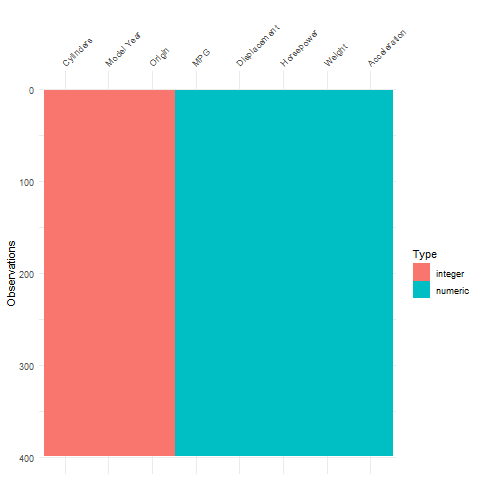

In [36]:
%%R -i df
visdat::vis_dat(df)

In [37]:
%%R -i df 
skimr::skim(df)

-- Data Summary ------------------------
                           Values
Name                       df    
Number of rows             398   
Number of columns          8     
_______________________          
Column type frequency:           
  numeric                  8     
________________________         
Group variables            None  

-- Variable type: numeric ------------------------------------------------------
# A tibble: 8 x 11
  skim_variable n_missing complete_rate    mean      sd    p0    p25    p50
* <chr>             <int>         <dbl>   <dbl>   <dbl> <dbl>  <dbl>  <dbl>
1 MPG                   0             1   23.5    7.82      9   17.5   23  
2 Cylinders             0             1    5.45   1.70      3    4      4  
3 Displacement          0             1  193.   104.       68  104.   148. 
4 Horsepower            0             1  104.    38.2      46   76     95  
5 Weight                0             1 2970.   847.     1613 2224.  2804. 
6 Acceleration      

In [50]:
%%R -i obj_df 
df <- obj_df
df$Cylinders  <- as.factor(df$Cylinders)
df$Origin  <- as.factor(df$Origin)

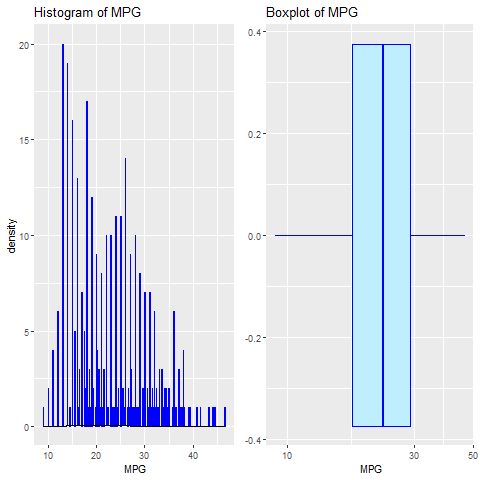

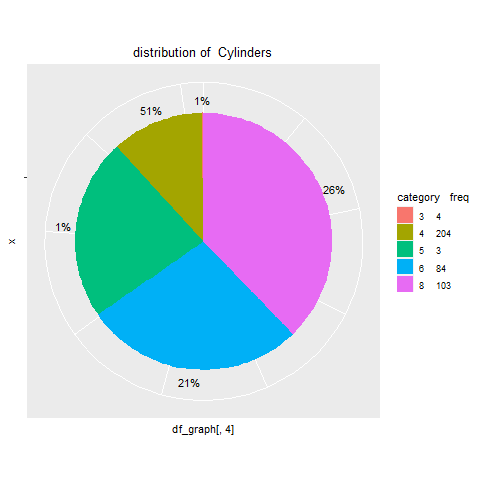

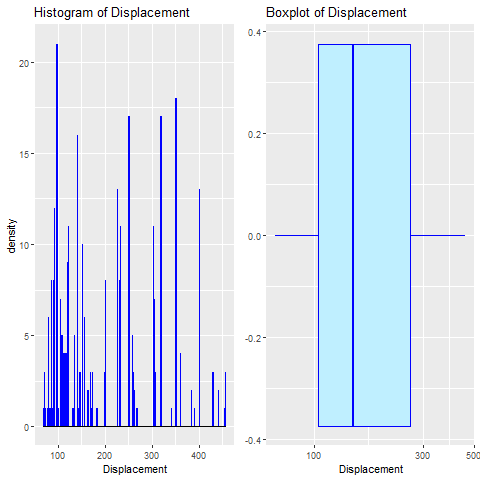

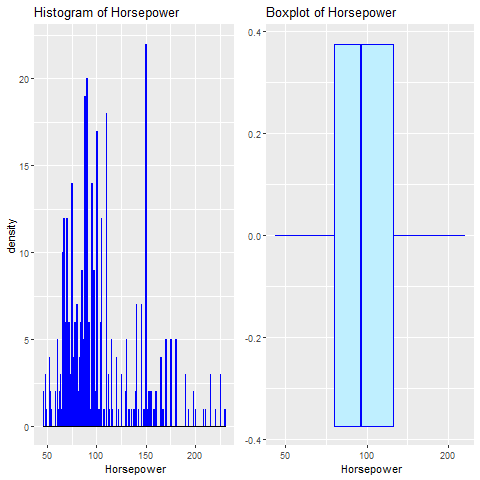

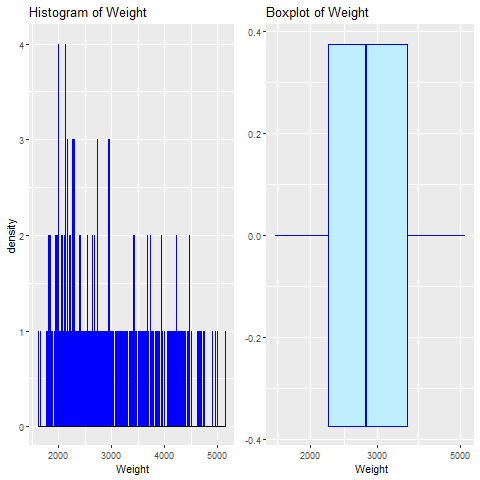

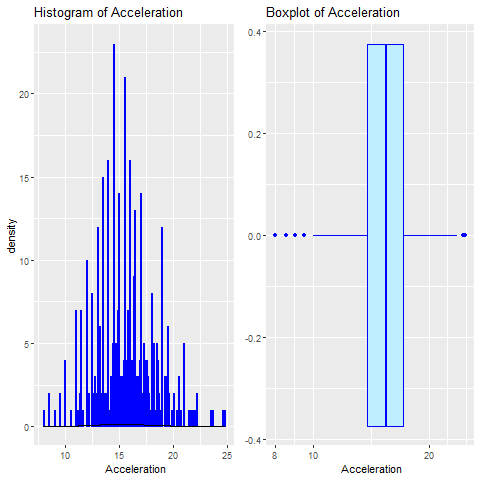

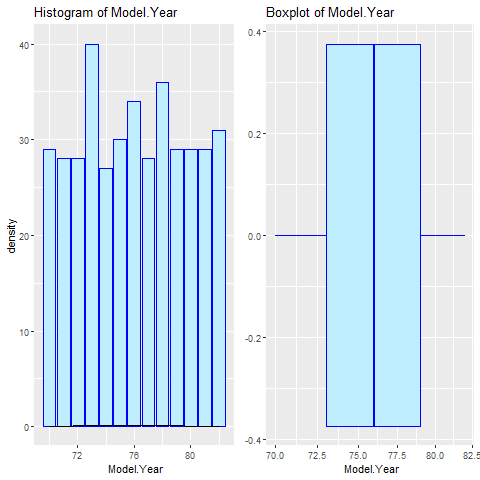

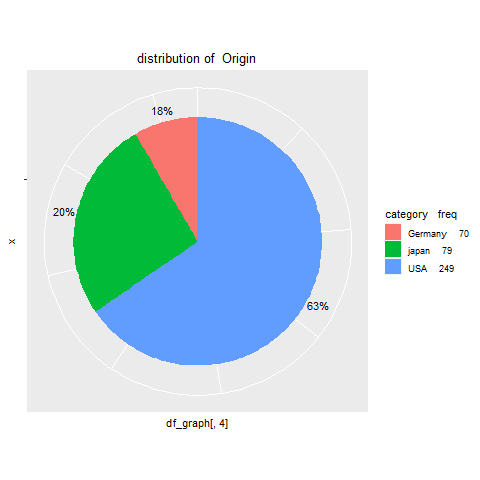

In [51]:
%%R
library(tidyverse)
explore_onevariable(df)

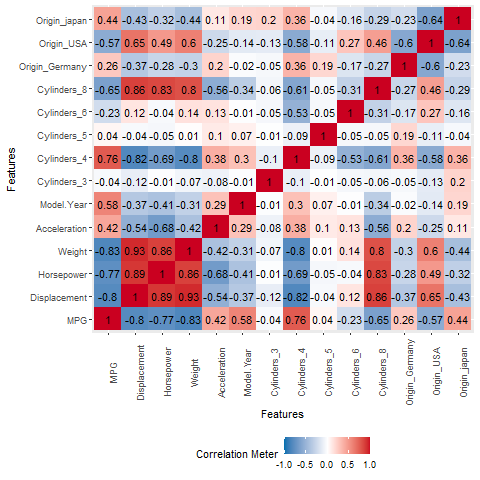

In [52]:
%%R
DataExplorer::plot_correlation(df)

ind  1 
ind  2 
ind  3 


R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  4 


R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  5 


R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  6 


R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  7 


R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  8 


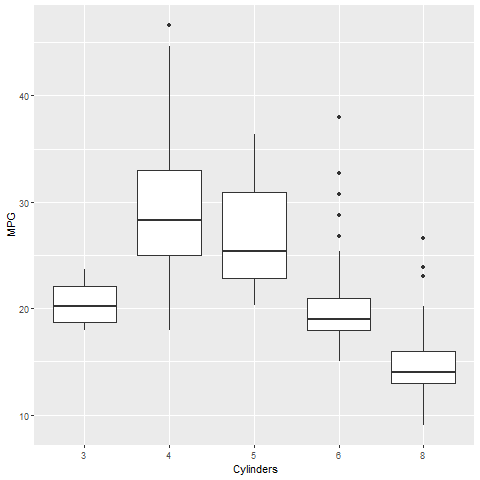

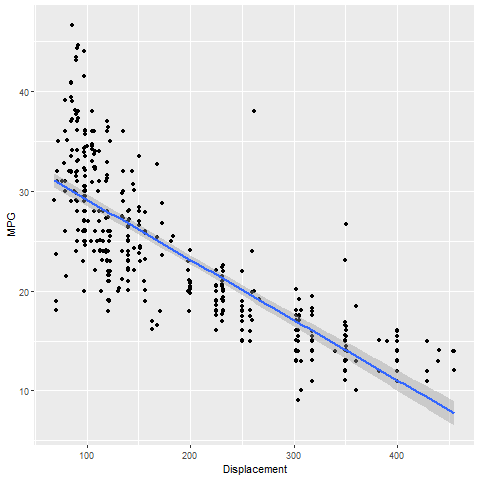

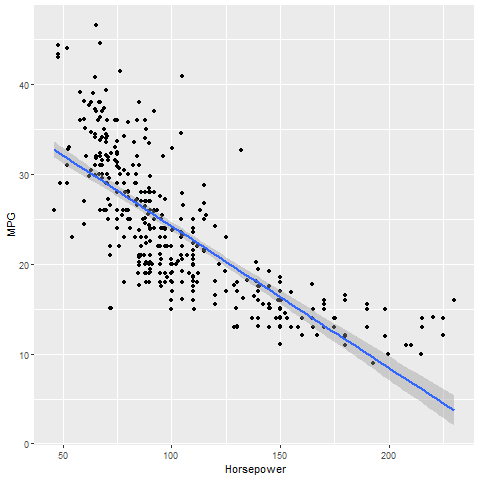

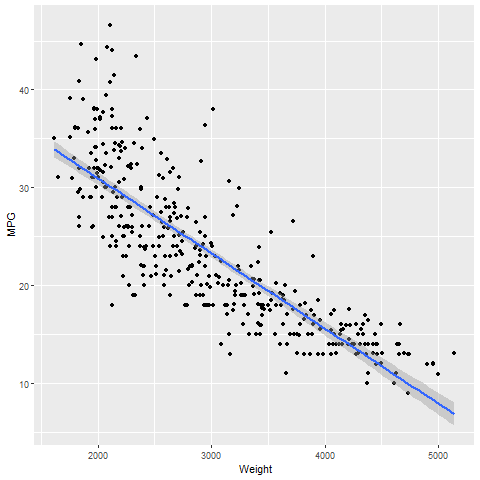

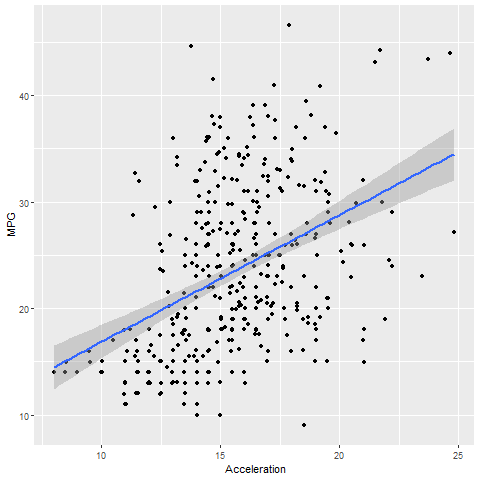

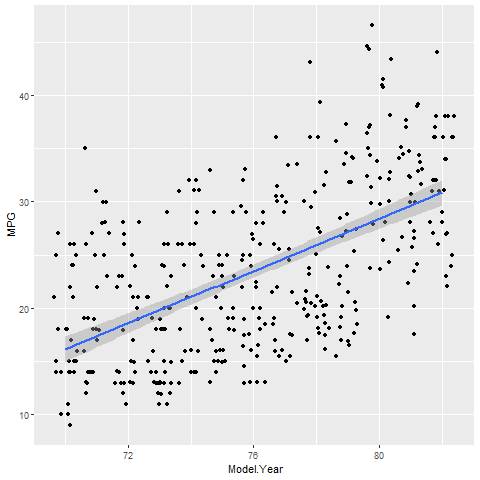

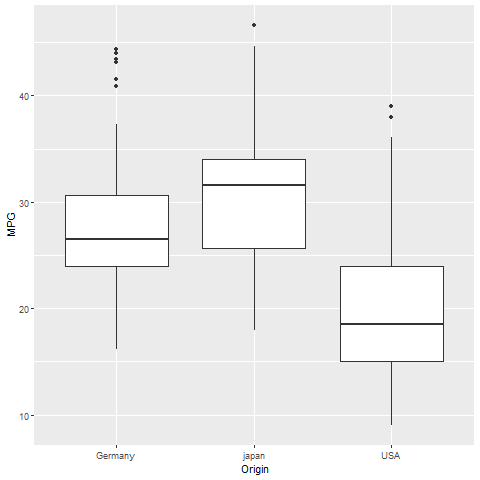

In [53]:
%%R
explore_twovariables(df,'MPG')

ind  1 
ind  2 
ind  3 


R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  4 


R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  5 


R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  6 


R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  7 


R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



ind  8 


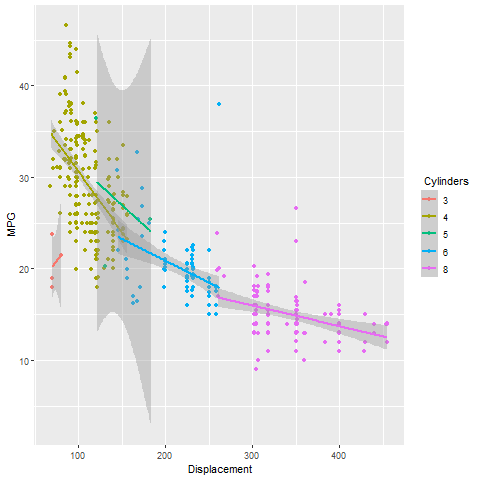

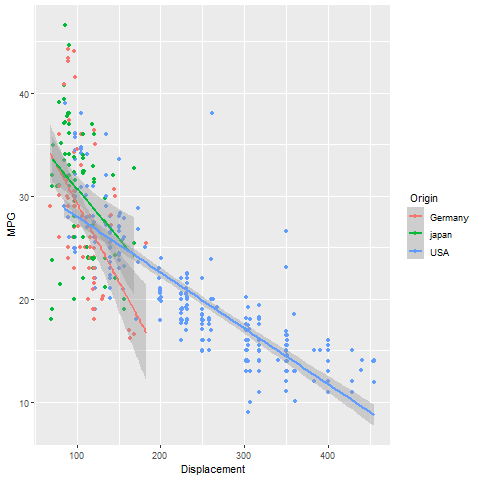

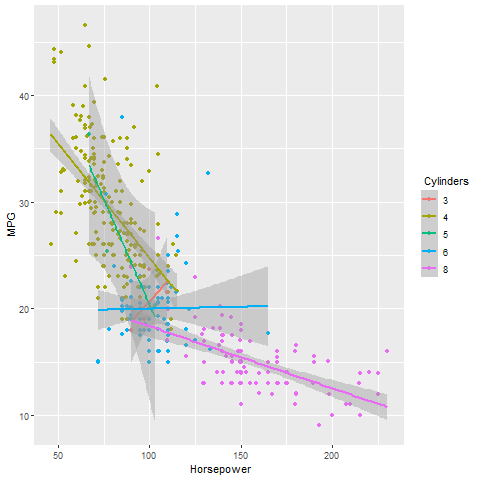

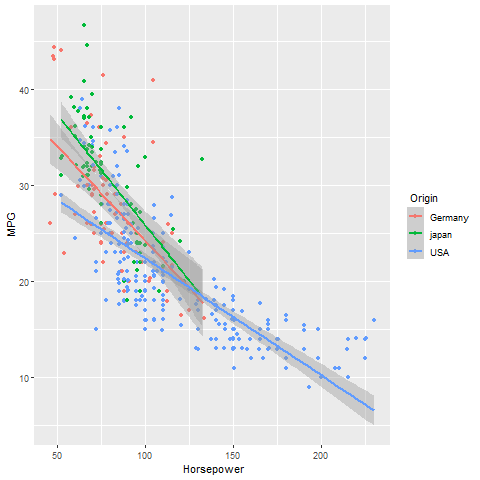

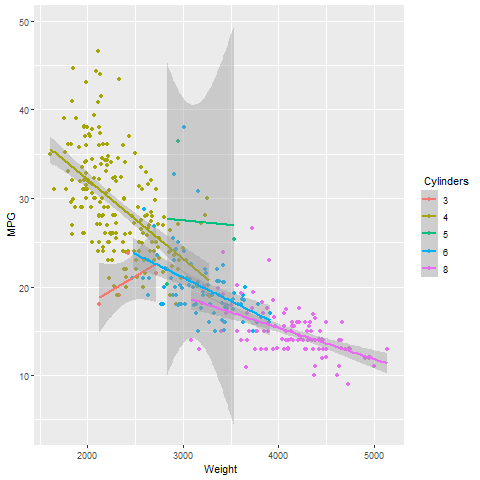

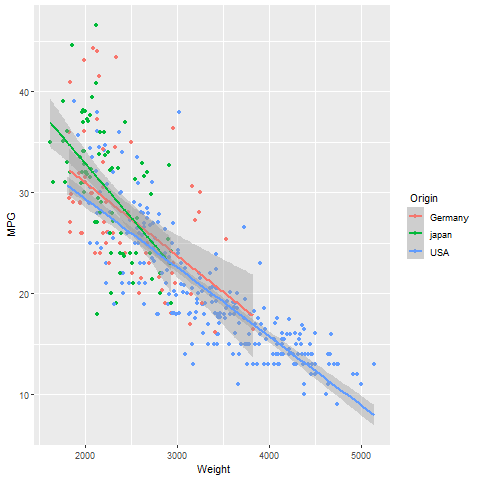

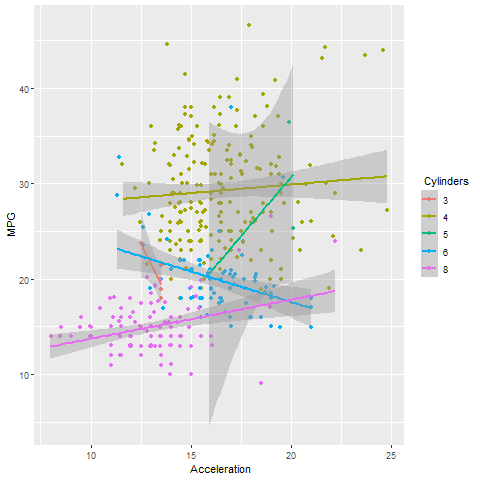

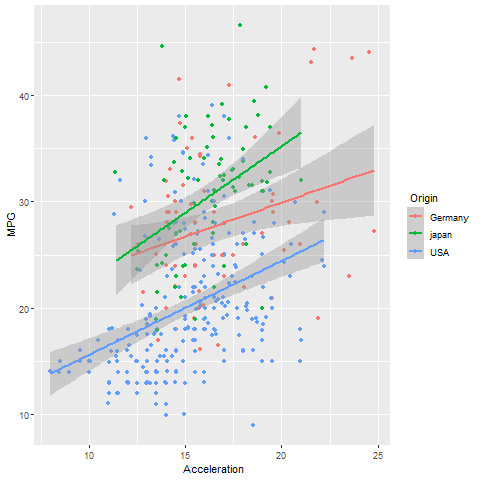

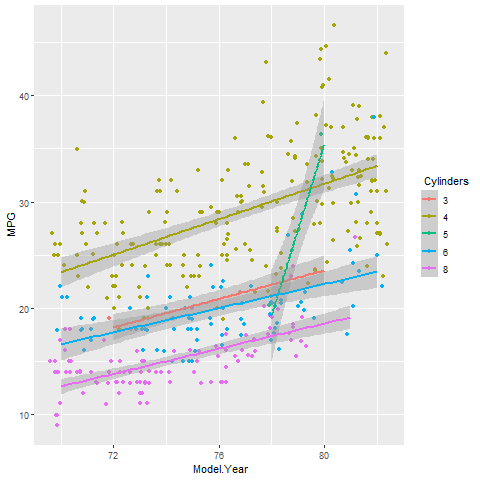

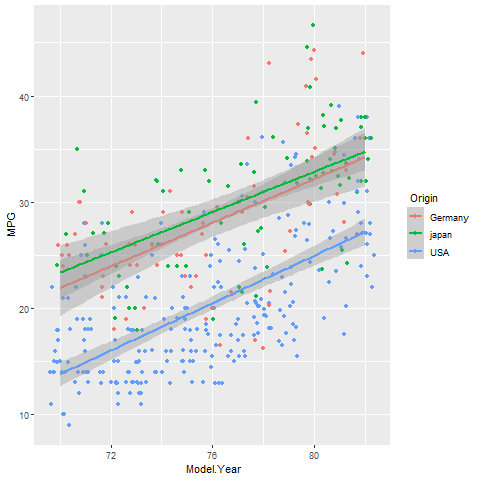

In [55]:
%%R
explore_threevariables(df,'MPG')

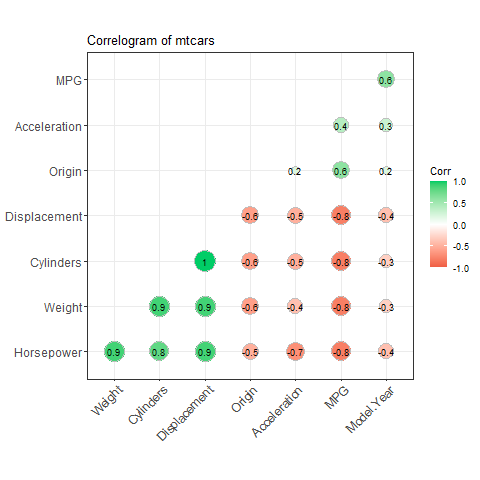

In [58]:
%%R  
library(ggcorrplot)
explore_corralation(df)    

In [65]:
# replacement
cleanup_nums = {'Origin':{1:'USA' , 2:'Germany' , 3:'japan'}}
df = df.replace(cleanup_nums)

In [66]:
# split data quantitative and qualitive data 
# extract  quantitative and qualitative data 
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
# remove target  and uninterested columns 

qualitative = [f for f in df.columns if df.dtypes[f] == 'object']
print( 'quantitative data is : {}'.format(quantitative))
print('qualitative data is :{}'.format(qualitative)  )


    

quantitative data is : ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
qualitative data is :['Origin']


In [70]:


# when you have some column that classify incorrectly remove from one and add it to another 
quantitative.remove('Cylinders')
qualitative.append('Cylinders')
print( 'quantitative data is : {}'.format(quantitative))
print('qualitative data is :{}'.format(qualitative)  )    

quantitative data is : ['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
qualitative data is :['Origin', 'Cylinders']


In [72]:

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())
    

False


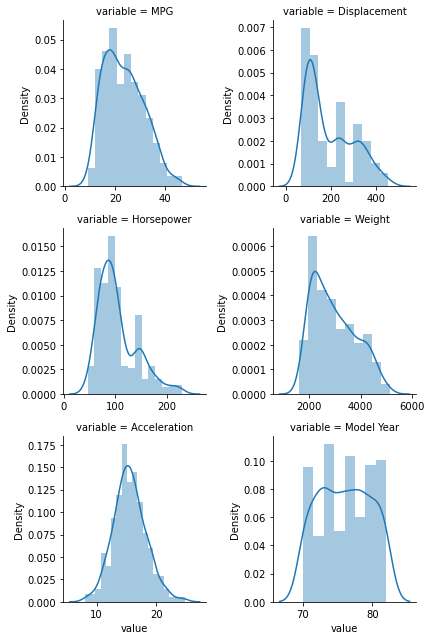

In [74]:

#density for quantitative col
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")    
    

In [77]:

for c in qualitative:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')
        
# unique values for every columns
df[qualitative].nunique()
# value_counts
for col in qualitative:
    print( df[col].value_counts())
    

USA        249
japan       79
Germany     70
Name: Origin, dtype: int64
4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64


In [78]:
df.dtypes

MPG              float64
Cylinders       category
Displacement     float64
Horsepower       float64
Weight           float64
Acceleration     float64
Model Year         int64
Origin          category
dtype: object

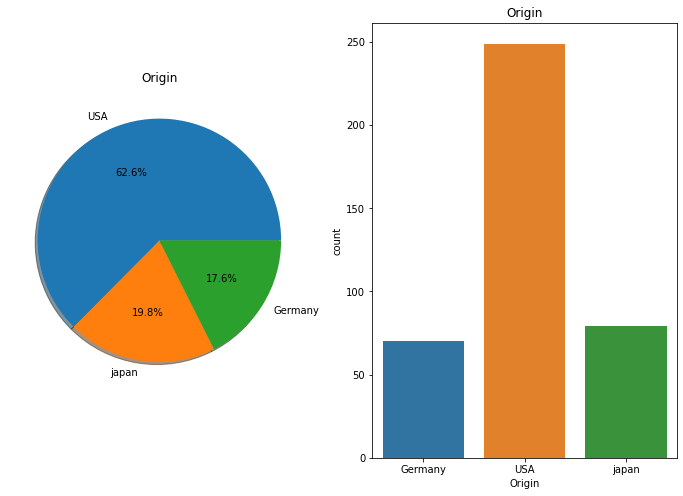

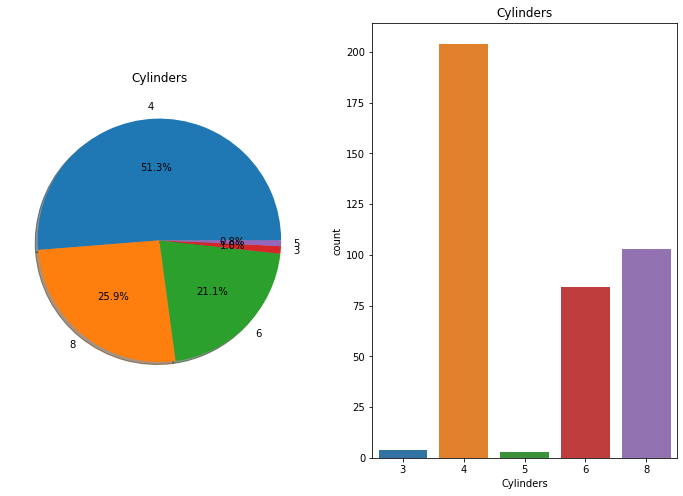

In [80]:

for col in qualitative:
    # you can change minimum unique values 
    if(df[col].nunique() < 10):
        f,ax=plt.subplots(1,2,figsize=(12,8))
        df[str(col)].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
        ax[0].set_title(col)
        ax[0].set_ylabel('')
        sns.countplot(col,data=df,ax=ax[1])
        ax[1].set_title(col)
        plt.show()    
    

In [81]:
rc.boxplots()

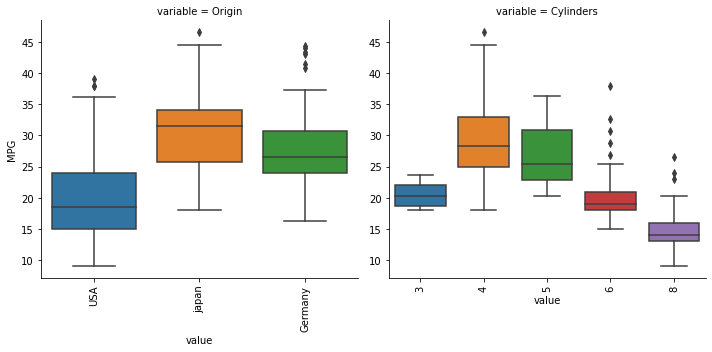

In [84]:

## box plot 
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
target = '' 
# remove one depend on type of task 
f = pd.melt(df, id_vars=['MPG'], value_vars=qualitative) # target here continouns 

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "MPG")     
    

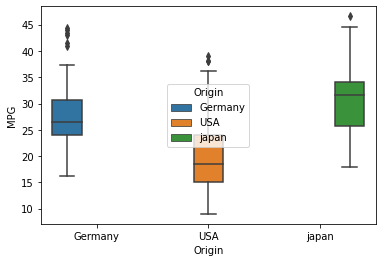

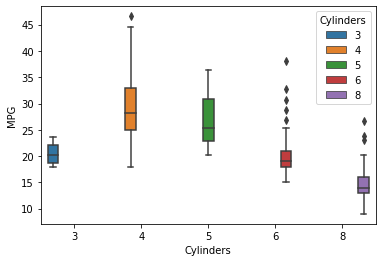

<Figure size 432x288 with 0 Axes>

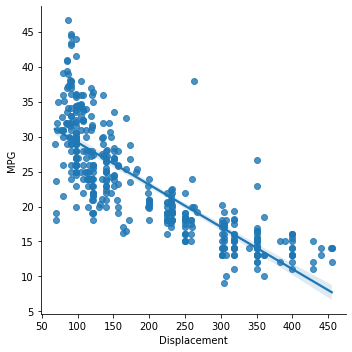

<Figure size 432x288 with 0 Axes>

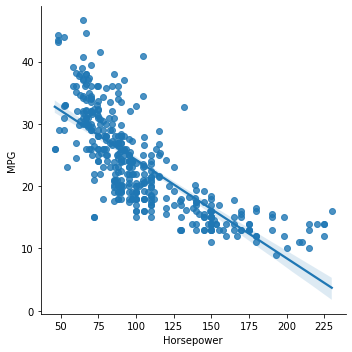

<Figure size 432x288 with 0 Axes>

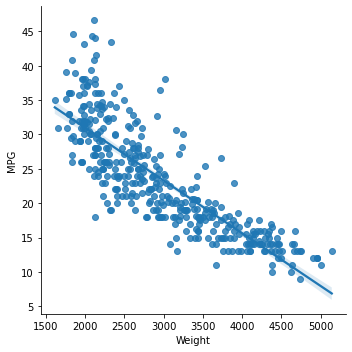

<Figure size 432x288 with 0 Axes>

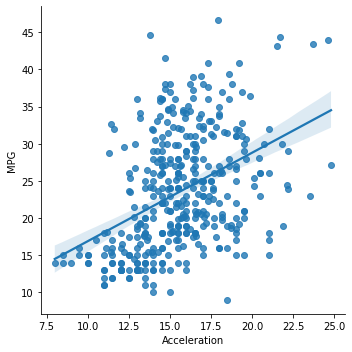

<Figure size 432x288 with 0 Axes>

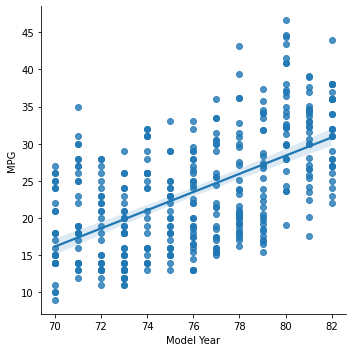

In [87]:
# if target is continouns 
target = 'MPG'
for col in qualitative:
    if(df[col].nunique() < 10 ):
        plt.figure()
        sns.boxplot(col,target,hue=col,data=df)
for col in quantitative:
    if((col != target)):
        plt.figure()
        sns.lmplot(col ,target,data =df)    
    

In [88]:
rc.three_variable()

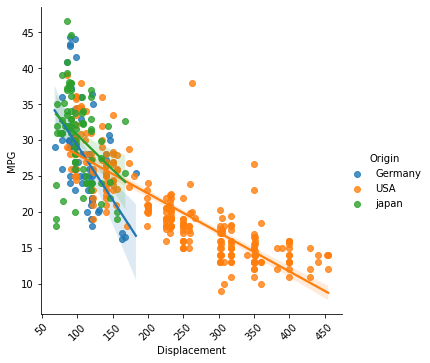

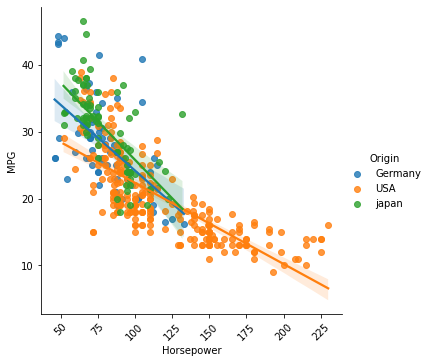

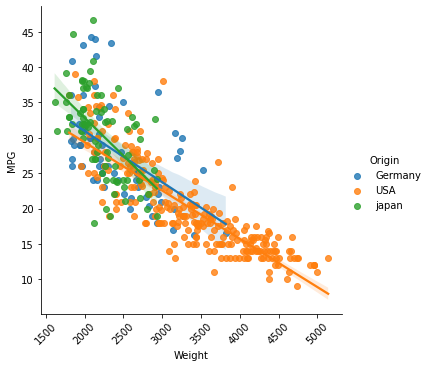

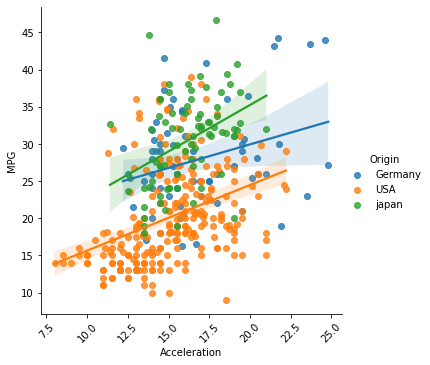

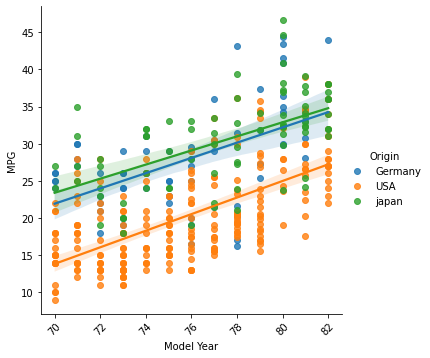

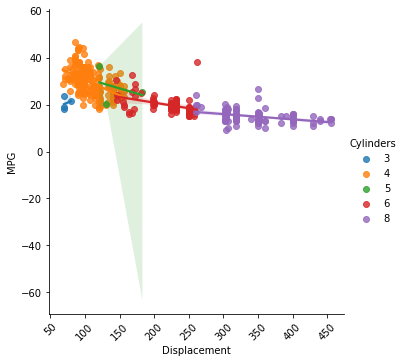

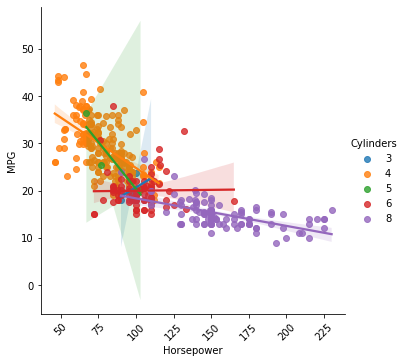

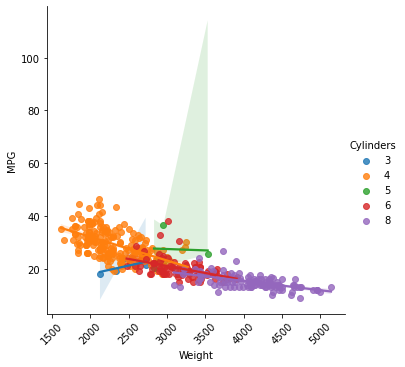

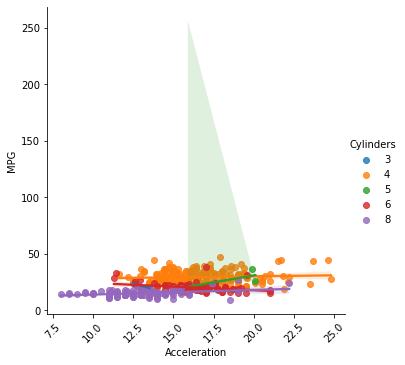

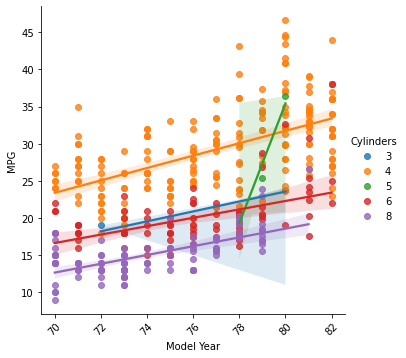

In [89]:


            
            
# target is continous 
target = "MPG"
qual = qualitative.copy()
quan = quantitative.copy()
quan.remove(target)
for i in range(len(qual)):
    for j in range(len(quan)):
        if(df[qual[i]].nunique() < 10):
            sns.lmplot(quan[j],target ,hue= qual[i] ,data =df)
            plt.gca().tick_params(axis='x', rotation=45)
    

In [91]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [95]:
df = pd.get_dummies(df, columns=["Origin"])
df = pd.get_dummies(df, columns=["Cylinders"])

In [96]:
df

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Germany,Origin_USA,Origin_japan,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
0,18.0,307.0,130.0,3504.0,12.0,70,0,1,0,0,0,0,0,1
1,15.0,350.0,165.0,3693.0,11.5,70,0,1,0,0,0,0,0,1
2,18.0,318.0,150.0,3436.0,11.0,70,0,1,0,0,0,0,0,1
3,16.0,304.0,150.0,3433.0,12.0,70,0,1,0,0,0,0,0,1
4,17.0,302.0,140.0,3449.0,10.5,70,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790.0,15.6,82,0,1,0,0,1,0,0,0
394,44.0,97.0,52.0,2130.0,24.6,82,1,0,0,0,1,0,0,0
395,32.0,135.0,84.0,2295.0,11.6,82,0,1,0,0,1,0,0,0
396,28.0,120.0,79.0,2625.0,18.6,82,0,1,0,0,1,0,0,0


In [100]:
df.columns

Index(['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Origin_Germany', 'Origin_USA', 'Origin_japan',
       'Cylinders_3', 'Cylinders_4', 'Cylinders_5', 'Cylinders_6',
       'Cylinders_8'],
      dtype='object')

In [44]:
obj_df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Germany
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


we will use this algorithm to predict MPG values depend on others columns
1) KNeighborsRegressor() 
2) LinearRegression()
3) Ridge_lasso_poly()
4) RFregression()
5) NNRegression()
1)cross_validation()
metrics_modelselection()
metrics_regression()
    

In [103]:
rc.cross_validation()

In [105]:
y = df.pop('MPG')
X = df

In [120]:
X.shape

(398, 13)

In [108]:
X.head()

,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Germany,Origin_USA,Origin_japan,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
0,307.0,130.0,3504.0,12.0,70,0,1,0,0,0,0,0,1
1,350.0,165.0,3693.0,11.5,70,0,1,0,0,0,0,0,1
2,318.0,150.0,3436.0,11.0,70,0,1,0,0,0,0,0,1
3,304.0,150.0,3433.0,12.0,70,0,1,0,0,0,0,0,1
4,302.0,140.0,3449.0,10.5,70,0,1,0,0,0,0,0,1


In [109]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

In [104]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X, y) 

NameError: name 'KNeighborsClassifier' is not defined

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
# apply scaler 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for  K in [1, 3, 7, 15, 55]:
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train_scaled, y_train)
    train_score = knnreg.score(X_train_scaled, y_train)
    test_score = knnreg.score(X_test_scaled, y_test)
    y_predict    = knnreg.predict(X_test_scaled)
    #print('K is {} , test_score is {} '.format(K,test_score))   
    print("K is {} ,r2_score (linear model): {:.2f}".format(K ,r2_score(y_test, y_predict)))

K is 1 ,r2_score (linear model): 0.80
K is 3 ,r2_score (linear model): 0.85
K is 7 ,r2_score (linear model): 0.86
K is 15 ,r2_score (linear model): 0.84
K is 55 ,r2_score (linear model): 0.73


In [123]:
rc.LinearRegression()

In [126]:
from sklearn.linear_model import LinearRegression



linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))



linear model coeff (w): [ 0.01961461 -0.03802507 -0.00579625  0.17033414  0.71555816  0.35012383
 -1.70821903  1.35809519 -3.61036033  2.67049749 -0.65090804 -0.16267024
  1.75344111]
linear model intercept (b): -17.312
R-squared score (training): 0.842
R-squared score (test): 0.839


In [135]:
from sklearn.linear_model import LinearRegression



linreg = LinearRegression().fit(X_train_scaled, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))



linear model coeff (w): [  7.59085512  -6.99661301 -19.62031498   2.82754676   8.58669794
   0.35012383  -1.70821903   1.35809519  -3.61036033   2.67049749
  -0.65090804  -0.16267024   1.75344111]
linear model intercept (b): 23.552
R-squared score (training): -57822458.003
R-squared score (test): 0.839


In [139]:
from sklearn.linear_model import Ridge
print('Ridge regression: effect of alpha regularization parameter')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f} num abs(coeff) > 1.0: {}, r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter
Alpha = 0.00 num abs(coeff) > 1.0: 13, r-squared training: 0.84, r-squared test: 0.84
Alpha = 1.00 num abs(coeff) > 1.0: 9, r-squared training: 0.84, r-squared test: 0.83
Alpha = 10.00 num abs(coeff) > 1.0: 10, r-squared training: 0.80, r-squared test: 0.81
Alpha = 20.00 num abs(coeff) > 1.0: 9, r-squared training: 0.78, r-squared test: 0.79
Alpha = 50.00 num abs(coeff) > 1.0: 8, r-squared training: 0.72, r-squared test: 0.74
Alpha = 100.00 num abs(coeff) > 1.0: 8, r-squared training: 0.65, r-squared test: 0.67
Alpha = 1000.00 num abs(coeff) > 1.0: 0, r-squared training: 0.22, r-squared test: 0.22


In [144]:
from sklearn.linear_model import Lasso
print('Lasso regression: effect of alpha regularizationparameter on number of features kept in final model')

for alpha in [0.001, 0.01 ,0.1 , 0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}Features kept: {}, r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularizationparameter on number of features kept in final model
Alpha = 0.00Features kept: 11, r-squared training: 0.84, r-squared test: 0.84
Alpha = 0.01Features kept: 10, r-squared training: 0.84, r-squared test: 0.84
Alpha = 0.10Features kept: 6, r-squared training: 0.82, r-squared test: 0.84
Alpha = 0.50Features kept: 6, r-squared training: 0.70, r-squared test: 0.73
Alpha = 1.00Features kept: 3, r-squared training: 0.53, r-squared test: 0.54
Alpha = 2.00Features kept: 1, r-squared training: 0.30, r-squared test: 0.31
Alpha = 3.00Features kept: 0, r-squared training: 0.00, r-squared test: -0.00
Alpha = 5.00Features kept: 0, r-squared training: 0.00, r-squared test: -0.00
Alpha = 10.00Features kept: 0, r-squared training: 0.00, r-squared test: -0.00
Alpha = 20.00Features kept: 0, r-squared training: 0.00, r-squared test: -0.00
Alpha = 50.00Features kept: 0, r-squared training: 0.00, r-squared test: -0.00


In [148]:
rc.Ridge_lasso_poly()

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
########################################
# preprocessing 
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
##############################################
print('Ridge regression: effect of alpha regularization parameter
')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}
num abs(coeff) > 1.0: {}, r-squared training: {:.2f}, r-squared test: {:.2f}
'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
##############################################
print('Lasso regression: effect of alpha regularization
parameter on number of features kept in final model
')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}
Features kept: {}, r-squared training: {:.2f}, r-squared test: {:.2f}
'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
         

In [149]:
from sklearn.preprocessing import PolynomialFeatures
# preprocessing 
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
##############################################
print('Ridge regression: effect of alpha regularization parameter')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f} num abs(coeff) > 1.0: {}, r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))


         

Ridge regression: effect of alpha regularization parameter
Alpha = 0.00 num abs(coeff) > 1.0: 105, r-squared training: 0.86, r-squared test: -8712182088490355974471680.00
Alpha = 1.00 num abs(coeff) > 1.0: 37, r-squared training: 0.88, r-squared test: 0.87
Alpha = 10.00 num abs(coeff) > 1.0: 20, r-squared training: 0.85, r-squared test: 0.84
Alpha = 20.00 num abs(coeff) > 1.0: 14, r-squared training: 0.83, r-squared test: 0.83
Alpha = 50.00 num abs(coeff) > 1.0: 4, r-squared training: 0.78, r-squared test: 0.79
Alpha = 100.00 num abs(coeff) > 1.0: 2, r-squared training: 0.75, r-squared test: 0.76
Alpha = 1000.00 num abs(coeff) > 1.0: 0, r-squared training: 0.52, r-squared test: 0.53


In [150]:
rc.RFregression()

In [161]:
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))


r2_score (linear model): 0.90


In [165]:
regr.feature_importances_

array([1.84443260e-01, 1.82187369e-01, 2.04210268e-01, 3.10010135e-02,
       1.04025302e-01, 2.21281218e-03, 3.28958321e-03, 2.71722023e-03,
       1.56471381e-04, 2.85008156e-01, 1.21466667e-04, 4.90510071e-04,
       1.36568240e-04])

In [166]:


rc.NNRegression()



    

In [ ]:

from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)
for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train_scaled, y_train)
        y_predict_output = mlpreg.predict(X_test_scaled)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_test_scaled, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression
alpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()
################################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
    